##1. 딥러닝이란?
deep stack으로 특징지어지는 머신러닝에 대한 접근 방식을 말한다. 가장 어려운 실제 데이터 셋에서 발견되는 복잡하고 계층적인 패턴의 종류를 분리할 수 있다. **신경망**을 모델로 사용한다. 신경망은 **뉴런**으로 구성되며, 뉴런은 개별적으로 간단한 계산만 수행한다. 뉴런의 연결에는 **가중치**가 붙고, 연결을 통해 값이 이어질 때마다 이 가중치가 곱해진다. 신경망은 가중치를 수정하여 학습한다. b는 **편향**을 뜻하고 특별한 종류의 가중치이다. 뉴런으로 하여금 입력과 출력을 독립적으로 수정할 수 있게 만든다.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#2. Deep Neural Network
- 신경망은 일반적으로 뉴런을 Layer로 구성
- 신경망의 각 레이어는 비교적 간단한 변환을 수행하는 것으로 생각할 수 있음
- 심층적인 레이어 스택을 통해 신경망은 복잡한 방식으로 입력을 변환할 수 있음
- 활성화 함수가 없으면 신경망은 선형 관계만 학습할 수 있기 때문에 **활성화 함수**는 필수적이다.
- 활성화 함수는 레이어의 출력에 적용하는 일부 함수일 뿐이다.
- 정류기 함수를 "ReLU 함수"라고 부르는 것이 일반적. 선형 단위에 ReLU 활성화를 적용하면 출력이 최대(0, w * x + b)가 된다.

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

#3. Stochastic Gradient Descent
- 손실 함수 : 네트워크의 예측이 얼마나 좋은지 측정
- 옵티마이저 : 네트워크의 가중치를 변경하는 방법을 알려준다.
- 손실 함수는 대상의 실제 값과 모델이 예측하는 값 사이의 차이를 측정
- 회귀 문제에 대한 일반적인 손실 함수는 평균 절대 오차 또는 MAE
- 옵티마이저는 손실을 최소화하기 위해 가중치를 조정하는 알고리즘
- 딥 러닝에 사용되는 거의 모든 최적화 알고리즘은 확률적 경사 하강이라는 계열에 속한다.
- 일부 학습 데이터를 샘플링하고 네트워크를 통해 실행하여 예측을 수행,
예측과 참값 사이의 손실을 측정,
마지막으로 손실이 적은 방향으로 가중치를 조정.
- 손실이 원하는 만큼 작아질 때까지(또는 더 이상 감소하지 않을 때까지) 계속해서 이 작업을 수행

In [3]:
model.compile(
    optimizer="adam",
    loss="mae",
)

In [4]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [5]:
print(X_train.shape)

(1119, 11)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.3417 - val_loss: 0.1265
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1299 - val_loss: 0.1175
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1216 - val_loss: 0.1166
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1119 - val_loss: 0.1090
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1116 - val_loss: 0.1099
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1085 - val_loss: 0.1030
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1047 - val_loss: 0.1036
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1024 - val_loss: 0.1084
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1055 - val_loss: 0.1001
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0997 - val_loss: 0.0995


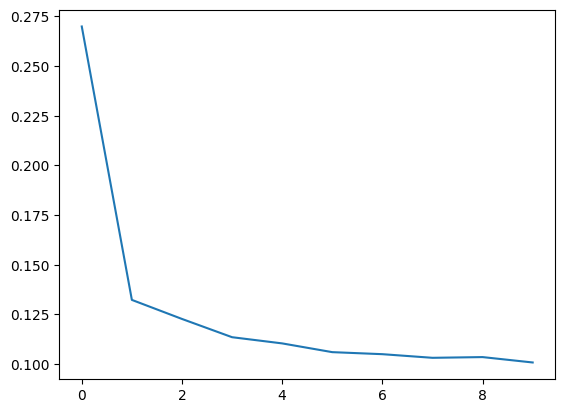

In [9]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

#4. Overfitting and Underfitting
- 모델을 훈련할 때 신호가 충분하지 않거나 노이즈가 너무 많으면 두 가지 문제가 발생할 수 있음
- 모델이 신호를 충분히 학습하지 않았기 때문에 손실이 가능한 만큼 낮지 않은 경우
- 그리고 모델이 노이즈를 너무 많이 학습했기 때문에 손실이 가능한 만큼 낮지 않은 경우
- 전자가 Underfitting, 후자가 Overfitting
- 노이즈를 줄이면서 훈련 데이터에서 더 많은 신호를 얻을 수 있는 몇 가지 방법
- 네트워크를 더 넓게(기존 레이어보다 더 많은 단위) 만들거나 더 깊게(더 많은 레이어 추가) 네트워크의 용량을 늘릴 수 있다. 더 넓은 네트워크는 더 많은 선형 관계를 학습하는 데 더 쉬운 반면, 더 깊은 네트워크는 더 비선형 관계를 선호.
- 모델이 노이즈를 너무 열심히 학습하는 경우 훈련 중에 검증 손실이 증가 -> 검증 손실이 더 이상 감소하지 않는 것처럼 보일 때마다 훈련을 중단 = early stopping

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.001, # minimium amount of change to count as an improvement
    patience = 20, # how many epochs to wait before stopping
    restore_best_weights = True,
)

In [12]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [13]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Minimum validation loss: 0.09092577546834946


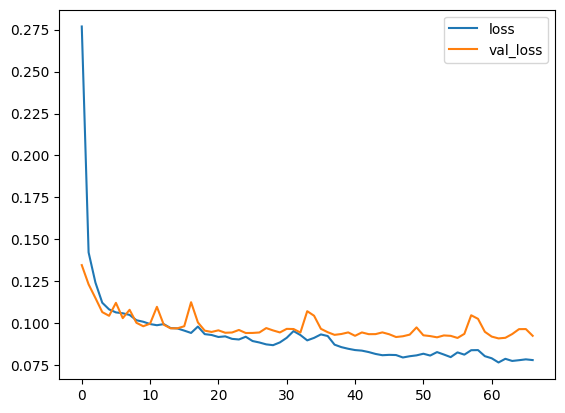

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

#5. Dropout and Batch Normalization
- 과적합을 수정하는 데 도움이 될 수 있는 '드롭아웃 레이어'
- 훈련 단계마다 레이어의 입력 단위 중 일부를 무작위로 드롭 -> 네트워크가 훈련 데이터에서 이러한 가짜 패턴을 학습하지 못하게 한다.
- 느리거나 불안정한 훈련을 수정하는 데 도움이 될 수 있는 "배치 정규화"
- 데이터가 네트워크에 들어가기 전에 정규화하는 것이 좋다면 네트워크 내부에서 정규화하는 것도 더 나을 수 있다.
- 배치 정규화 레이어는 들어오는 각 배치를 살펴보고, 먼저 자신의 평균과 표준 편차로 배치를 정규화한 다음 두 개의 훈련 가능한 리스케일링 매개변수를 사용하여 데이터를 새로운 스케일에 배치한다.

In [15]:
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])

<Sequential name=sequential_7, built=False>

In [16]:
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),

(<BatchNormalization name=batch_normalization, built=False>,)

In [17]:
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<Activation name=activation, built=False>,)

In [18]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-18-a00e1dd19f27>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


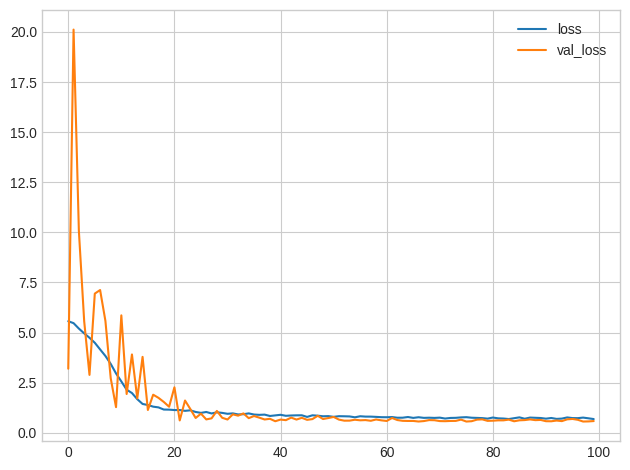

In [20]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

#6. Binary Classification
- 정확도는 분류 문제의 성공을 측정하는 데 사용되는 여러 지표 중 하나
- 정확한 예측과 총 예측의 비율, 정확도(및 대부분의 다른 분류 지표)의 문제는 손실 함수로 사용할 수 없다는 것
- 손실 함수로 작용할 대체물 = cross-entropy function
- 분류의 경우, 우리가 원하는 것은 확률 간의 거리이며, 이것을 교차 엔트로피가 제공
- 교차 엔트로피는 한 확률 분포에서 다른 확률 분포까지의 거리를 측정하는 일종의 척도
- 교차 엔트로피와 정확도 함수는 모두 0에서 1까지의 숫자를 의미하는 입력으로 확률을 필요로 함.
- 새로운 종류의 활성화 함수인 시그모이드 활성화

In [21]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('./ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [24]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.4835
Best Validation Accuracy: 0.8476


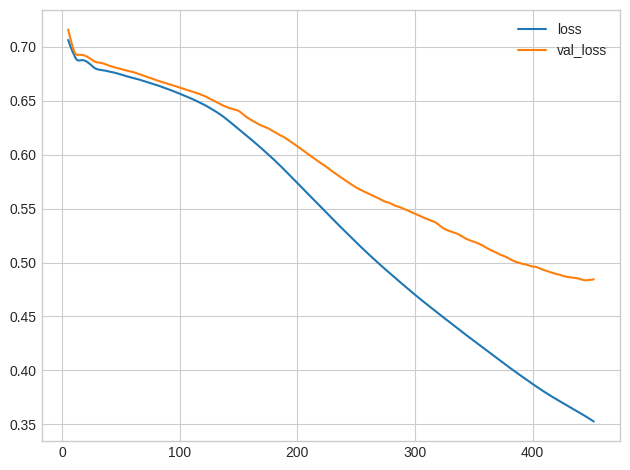

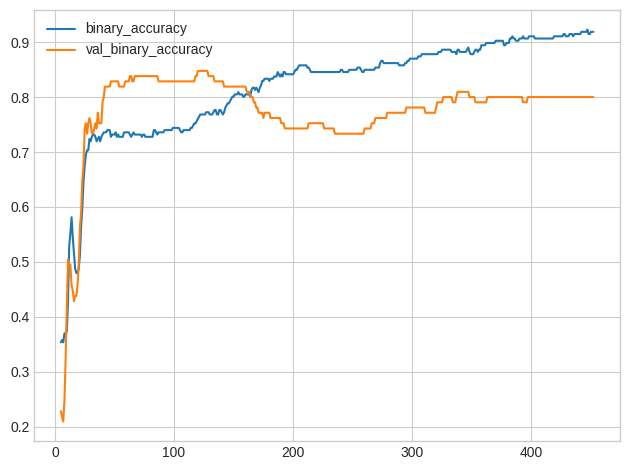

In [25]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))